In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

modelMilano = pd.read_csv("milano.csv")
modelYork = pd.read_csv("newyoork.csv")

/tmp/ipykernel_310/3735231116.py:7: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  modelYork = pd.read_csv("newyoork.csv")


In [72]:
from math import nan
from numpy import ceil

##Removing unnecessary values
#############################################################################################################################
York = modelYork.drop(['id','listing_url','scrape_id','last_scraped','source','name','description','neighborhood_overview','calendar_last_scraped','neighbourhood_cleansed','picture_url','host_url','host_name','host_since','host_about','host_thumbnail_url','host_picture_url','neighbourhood','bathrooms','bathrooms_text','amenities','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','calendar_updated','first_review','last_review','review_scores_checkin','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','license','host_neighbourhood','neighbourhood_group_cleansed'], axis=1)
Milano = modelMilano.drop(['id','listing_url','scrape_id','last_scraped','source','name','description','neighborhood_overview','calendar_last_scraped','neighbourhood_cleansed','picture_url','host_url','host_name','host_since','host_about','host_thumbnail_url','host_picture_url','neighbourhood','bathrooms','bathrooms_text','amenities','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','calendar_updated','first_review','last_review','review_scores_checkin','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','license','host_neighbourhood','neighbourhood_group_cleansed'], axis=1)
##################################################################################################
#label encode
Milano['room_type'] = Milano['room_type'].replace({'Private room': 1, 'Entire home/apt': 2, 'Hotel room': 3, 'Shared room': 4})

##################################################################################################
Milano['price'] = Milano['price'].replace('[\$,]', '', regex=True).astype(float)
Milano['host_location'] = Milano['host_location'].fillna("Unknown")
Milano['host_response_time'] = Milano['host_response_time'].fillna("Unknown")
Milano['host_response_rate'] = Milano['host_response_rate'].fillna("Unknown")
Milano['host_acceptance_rate'] = Milano['host_acceptance_rate'].fillna("Unknown")
Milano['bedrooms'] = Milano['bedrooms'].fillna(ceil(Milano['bedrooms'].mean()))#tam sayıya göre çevir sonra
Milano['beds'] = Milano['beds'].fillna(ceil(Milano['beds'].mean()))
##################################################################################################
Milano.replace({'f': 0, 't': 1,nan:0}, inplace=True)
##################################################################################################
Milano['review_scores_rating'] = Milano['review_scores_rating'].fillna(Milano['review_scores_rating'].mean())
Milano['review_scores_accuracy'] = Milano['review_scores_accuracy'].fillna(Milano['review_scores_accuracy'].mean())
Milano['review_scores_cleanliness'] = Milano['review_scores_cleanliness'].fillna(Milano['review_scores_cleanliness'].mean())
Milano['review_scores_communication'] = Milano['review_scores_communication'].fillna(Milano['review_scores_communication'].mean())
Milano['review_scores_location'] = Milano['review_scores_location'].fillna(Milano['review_scores_location'].mean())
Milano['review_scores_value'] = Milano['review_scores_value'].fillna(Milano['review_scores_value'].mean())
##################################################################################################
Milano['host_listings_count'] = Milano['host_listings_count'].fillna(Milano['host_listings_count'].mean())
Milano['host_total_listings_count'] = Milano['host_total_listings_count'].fillna(Milano['host_total_listings_count'].mean())
Milano['host_identity_verified'] = Milano['host_identity_verified'].replace(nan, 0)
Milano['host_is_superhost'] = Milano['host_is_superhost'].replace(nan, 0)
##################################################################################################
Milano['minimum_nights_avg_ntm'] = Milano['minimum_nights_avg_ntm'].fillna(Milano['minimum_nights_avg_ntm'].mean())
Milano['maximum_nights_avg_ntm'] = Milano['maximum_nights_avg_ntm'].fillna(Milano['maximum_nights_avg_ntm'].mean())
#############################################################################################################################
Milano['host_location'] = Milano['host_location'].astype("category")
Milano['host_location'] = Milano['host_location'].cat.codes
Milano['host_response_rate'] = Milano['host_response_rate'].astype("category")
Milano['host_response_rate'] = Milano['host_response_rate'].cat.codes
Milano['host_acceptance_rate'] = Milano['host_acceptance_rate'].astype("category")
Milano['host_acceptance_rate'] = Milano['host_acceptance_rate'].cat.codes
Milano['host_response_time'] = Milano['host_response_time'].astype("category")
Milano['host_response_time'] = Milano['host_response_time'].cat.codes
Milano['host_verifications'] = Milano['host_verifications'].astype("category")
Milano['host_verifications'] = Milano['host_verifications'].cat.codes
#######################################################################################################################
groups = Milano.property_type.unique()
properties = defaultdict(list)
Price_meanG = Milano.groupby('property_type')['price'].mean()
for i, j in enumerate(Price_meanG):
    if j < 100:
        properties['property_type_1'].append(groups[i])
    elif j < 200:
        properties['property_type_2'].append(groups[i])
    elif j < 300:
        properties['property_type_3'].append(groups[i])
    elif j < 400:
        properties['property_type_4'].append(groups[i])
    elif j < 500:
        properties['property_type_5'].append(groups[i])
    elif j < 600:
        properties['property_type_6'].append(groups[i])
    else:
        properties['property_type_7'].append(groups[i])
for key in properties:
    for value in properties[key]:
        York['property_type'] = York['property_type'].replace({value: key})
        
Milano["property_type"] = Milano["property_type"].astype('category')
Milano["property_type"] = Milano["property_type"].cat.codes

In [73]:
#############################################################################################################################
York['price'] = York['price'].replace('[\$,]', '', regex=True).astype(float)

# one-hot encode room_type
York['room_type'] = York['room_type'].replace({'Private room': 1, 'Entire home/apt': 2, 'Hotel room': 3, 'Shared room': 4})

##########################################################################################
York['host_location'] = York['host_location'].fillna("Unknown")
York['host_acceptance_rate'] = York['host_acceptance_rate'].fillna("0%")
York['host_response_time'] = York['host_response_time'].fillna("Unknown")
York['host_response_rate'] = York['host_response_rate'].fillna("0%")
##########################################################################################
York['bedrooms'] = York['bedrooms'].fillna(ceil(York['bedrooms'].mean())) #tam sayıya göre çevir sonra
York['beds'] = York['beds'].fillna(ceil(York['beds'].mean()))
York['review_scores_rating'] = York['review_scores_rating'].fillna(York['review_scores_rating'].mean())
York['review_scores_accuracy'] = York['review_scores_accuracy'].fillna(York['review_scores_accuracy'].mean())
York['review_scores_cleanliness'] = York['review_scores_cleanliness'].fillna(York['review_scores_cleanliness'].mean())
York['review_scores_communication'] = York['review_scores_communication'].fillna(York['review_scores_communication'].mean())
York['review_scores_location'] = York['review_scores_location'].fillna(York['review_scores_location'].mean())
York['review_scores_value'] = York['review_scores_value'].fillna(York['review_scores_value'].mean())

##########################################################################################
York.replace({'f': 0, 't': 1,nan:0}, inplace=True)
############################### PROPERTIES-LABEL-ENCODING ###############################
groups = York.property_type.unique()
properties = defaultdict(list)
Price_meanG = York.groupby('property_type')['price'].mean()
for i, j in enumerate(Price_meanG):
    if j < 100:
        properties['property_type_1'].append(groups[i])
    elif j < 200:
        properties['property_type_2'].append(groups[i])
    elif j < 300:
        properties['property_type_3'].append(groups[i])
    elif j < 400:
        properties['property_type_4'].append(groups[i])
    elif j < 500:
        properties['property_type_5'].append(groups[i])
    elif j < 600:
        properties['property_type_6'].append(groups[i])
    else:
        properties['property_type_7'].append(groups[i])
for key in properties:
    for value in properties[key]:
        York['property_type'] = York['property_type'].replace({value: key})
        
York["property_type"] = York["property_type"].astype('category')
York["property_type"] = York["property_type"].cat.codes
##########################################################################################
York['host_listings_count'] = York['host_listings_count'].fillna(York['host_listings_count'].mean())
York['host_total_listings_count'] = York['host_total_listings_count'].fillna(York['host_total_listings_count'].mean())
York['host_identity_verified'] = York['host_identity_verified'].replace(nan, 0)
York['host_is_superhost'] = York['host_is_superhost'].replace(nan, 0)
York['minimum_nights_avg_ntm'] = York['minimum_nights_avg_ntm'].fillna(York['minimum_nights_avg_ntm'].mean())
York['maximum_nights_avg_ntm'] = York['maximum_nights_avg_ntm'].fillna(York['maximum_nights_avg_ntm'].mean())
##########################################################################################
York['host_location'] = York['host_location'].astype("category")
York['host_location'] = York['host_location'].cat.codes
York['host_response_rate'] = York['host_response_rate'].astype("category")
York['host_response_rate'] = York['host_response_rate'].cat.codes
York['host_acceptance_rate'] = York['host_acceptance_rate'].astype("category")
York['host_acceptance_rate'] = York['host_acceptance_rate'].cat.codes
York['host_response_time'] = York['host_response_time'].astype("category")
York['host_response_time'] = York['host_response_time'].cat.codes
York['host_verifications'] = York['host_verifications'].astype("category")
York['host_verifications'] = York['host_verifications'].cat.codes
  
#Milano.isna().sum()

In [74]:
def outlier(dataset,col):
    #REMOVING OUTLIERS
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    return dataset[~((dataset[col] < (Q1 - 1.5 * IQR)) |(dataset[col] > (Q3 + 1.5 * IQR))).any(axis=1)]


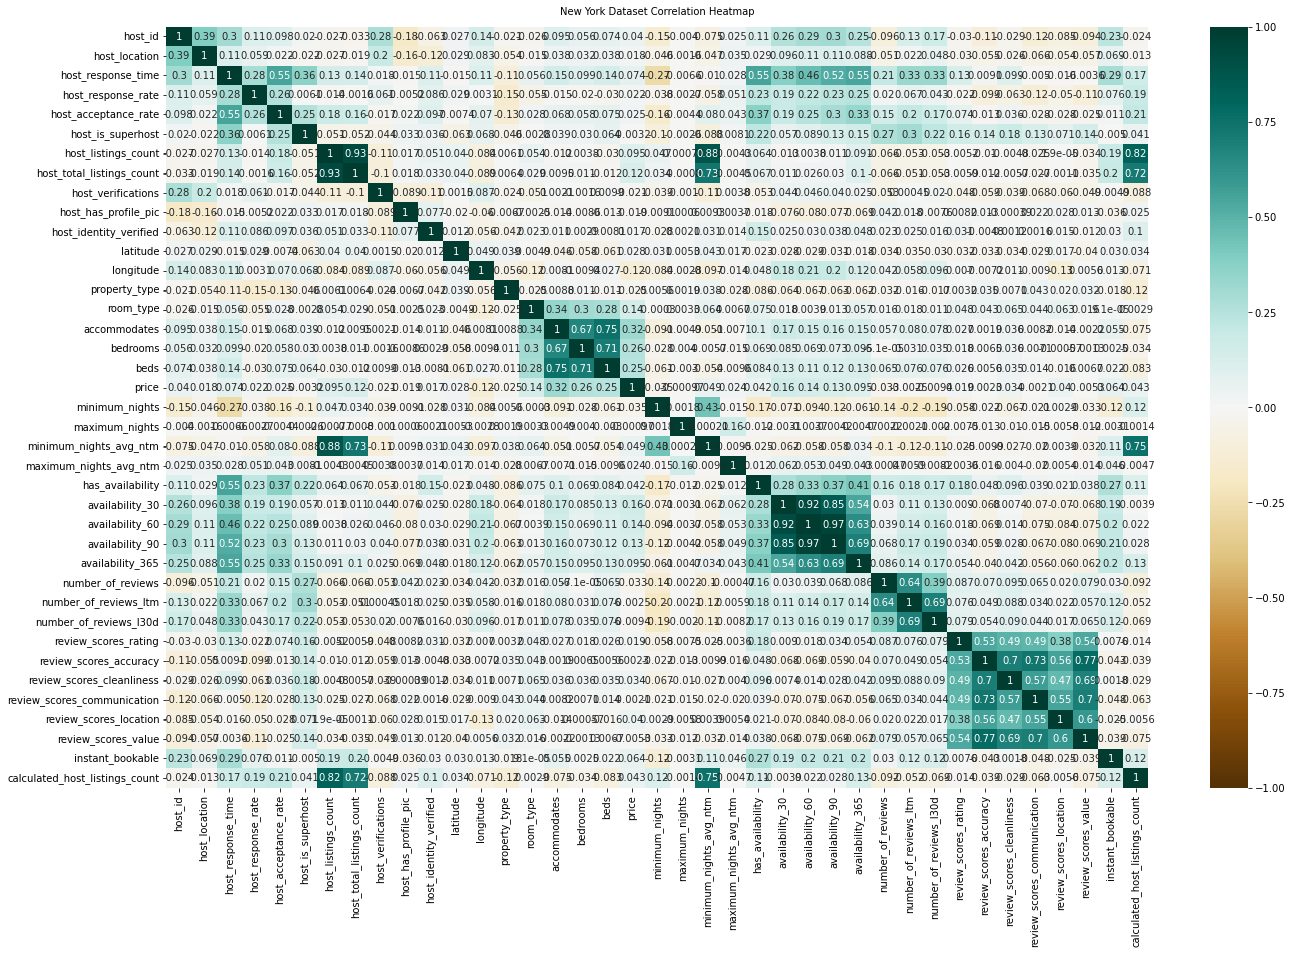

In [75]:
####-VISUALISING ( YORK )-
####Correlation Heatmap － 相関関係ヒートマッピ
import seaborn as sb
from pandas.plotting import table

plt.figure(figsize=(22, 14))
heatmap = sb.heatmap(York.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('New York Dataset Correlation Heatmap', fontdict={'fontsize':10}, pad=12);


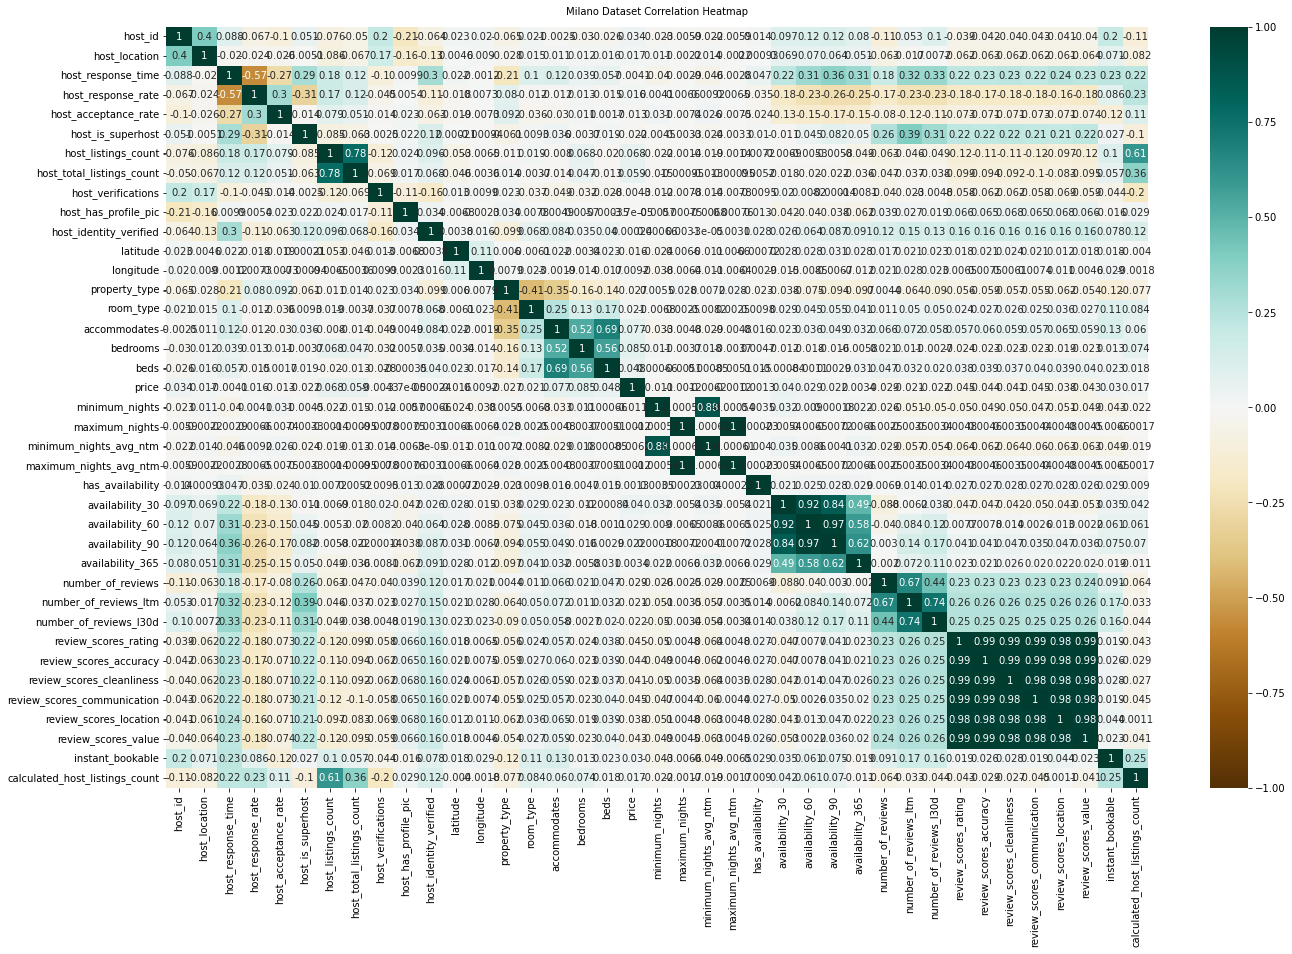

In [76]:
plt.figure(figsize=(22, 14))
heatmap = sb.heatmap(Milano.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Milano Dataset Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

In [77]:
#1-B) Mean and standard deviation ー 平均および標準偏差

#G_mean = York.drop(['host_id'],axis=1)
#G_mean.mean().plot(kind="bar")

<AxesSubplot:title={'center':'Popularity of Neighboorhood Groups (New York)'}, ylabel='neighbourhood_group_cleansed'>

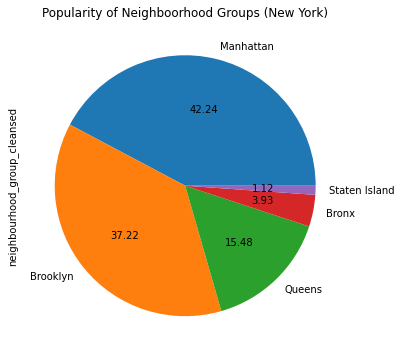

In [78]:
#C-) Popularity Analysis
#C1-)Showing most popular District locations ー 
N_Group = modelYork['neighbourhood_group_cleansed']
N_Group.value_counts().plot(kind='pie',autopct='%.2f',title="Popularity of Neighboorhood Groups (New York)",figsize=(6,6))

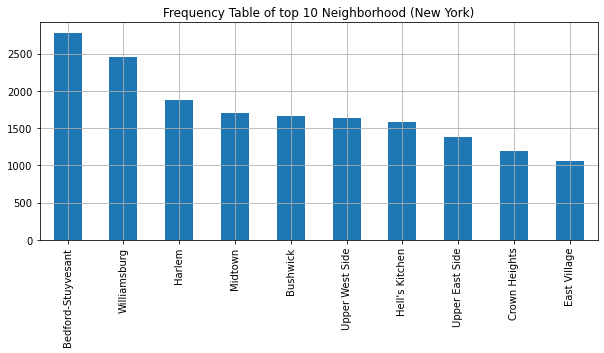

In [79]:
#C2 First ten popular neighborhoods
Nb = modelYork['neighbourhood_cleansed']
PPNB = Nb.value_counts()[:10].plot(kind="bar",figsize = (10,4),grid = True,title="Frequency Table of top 10 Neighborhood (New York)")

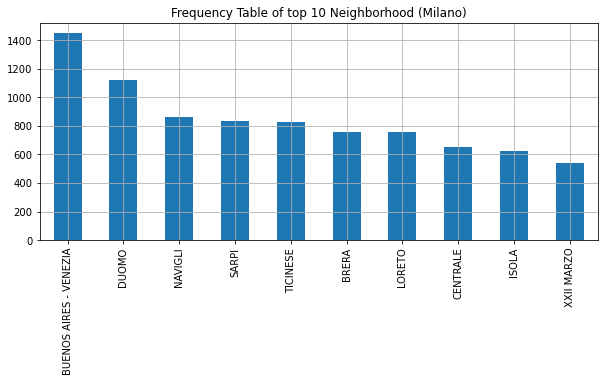

In [80]:
#C2 First ten popular neighborhoods
Nb_ml = modelMilano['neighbourhood_cleansed']
PPNB = Nb_ml.value_counts()[:10].plot(kind="bar",figsize = (10,4),grid = True,title="Frequency Table of top 10 Neighborhood (Milano)")

<AxesSubplot:title={'center':'Review Scores box plot (New York)'}>

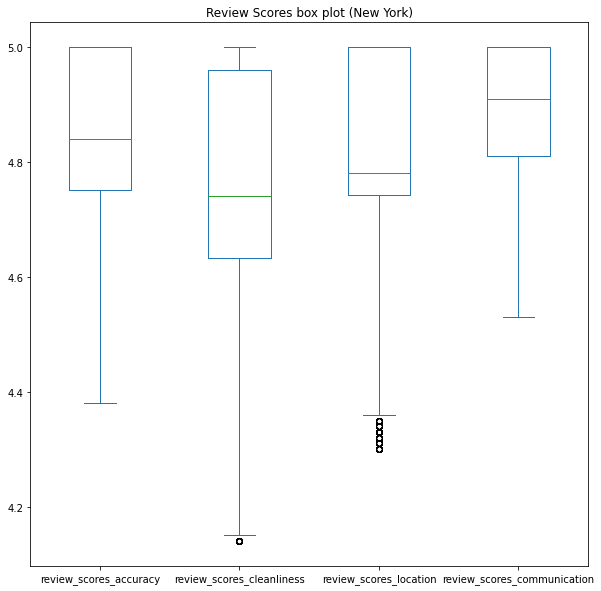

In [81]:
#outlier kaldırılıp bastırılacak
rev_set = York[['review_scores_accuracy','review_scores_cleanliness','review_scores_location','review_scores_communication']]
revlist = ['General Review Score Accuracy','General Review score of cleanliness','General Review score of Location','General Review score of Host Comm.']


rev_set = outlier(rev_set,rev_set.columns)

rev_set[rev_set > 4.0].plot(kind="box",figsize=(10,10),title="Review Scores box plot (New York)")

<AxesSubplot:title={'center':'Review Scores box plot (Milano)'}>

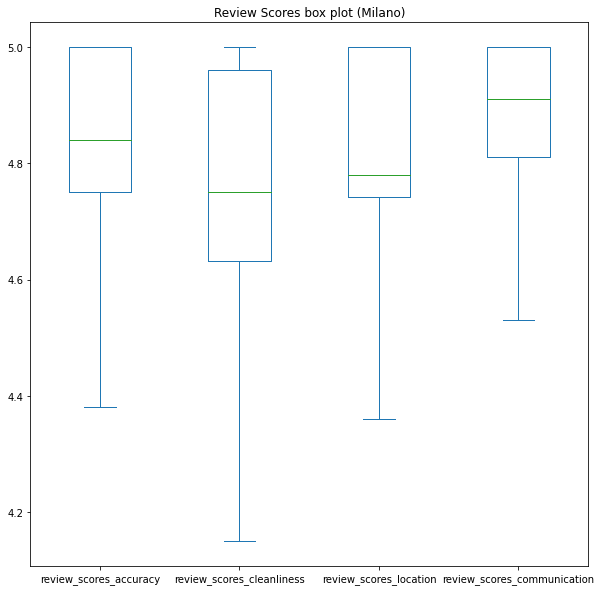

In [82]:
#outlier kaldırılıp bastırılacak
rev_mil = Milano[['review_scores_accuracy','review_scores_cleanliness','review_scores_location','review_scores_communication']]
revlist = ['General Review Score Accuracy','General Review score of cleanliness','General Review score of Location','General Review score of Host Comm.']


rev_mil = outlier(rev_set,rev_set.columns)

rev_mil[rev_mil > 4.0].plot(kind="box",figsize=(10,10),title="Review Scores box plot (Milano)")

		Availability Of New York Dataset


availability_30        AxesSubplot(0.125,0.125;0.168478x0.755)
availability_60     AxesSubplot(0.327174,0.125;0.168478x0.755)
availability_90     AxesSubplot(0.529348,0.125;0.168478x0.755)
availability_365    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

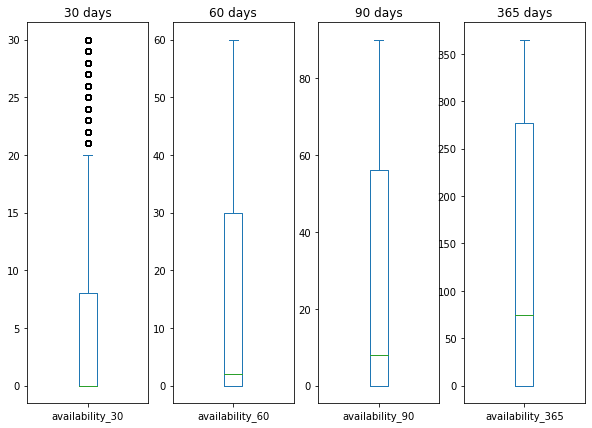

In [83]:
#General Availability of lodgings in New York Dataset
#availability_30
labels = [York['availability_30'].value_counts(),
          York['availability_60'].value_counts(),
          York['availability_90'].value_counts(),
          York['availability_365'].value_counts()]
avalist = ['30 days','60 days','90 days','365 days']
print("\t\tAvailability Of New York Dataset")
York[['availability_30','availability_60','availability_90','availability_365']].plot(kind = 'box',subplots=True,title=avalist,figsize=(10,7),
                                                                                     style=['r', 'g', 'b', 'yellow'])
#Outlier'ları sil 外れ値を除いとけ!

		Availability Of Milano Dataset


availability_30        AxesSubplot(0.125,0.125;0.168478x0.755)
availability_60     AxesSubplot(0.327174,0.125;0.168478x0.755)
availability_90     AxesSubplot(0.529348,0.125;0.168478x0.755)
availability_365    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

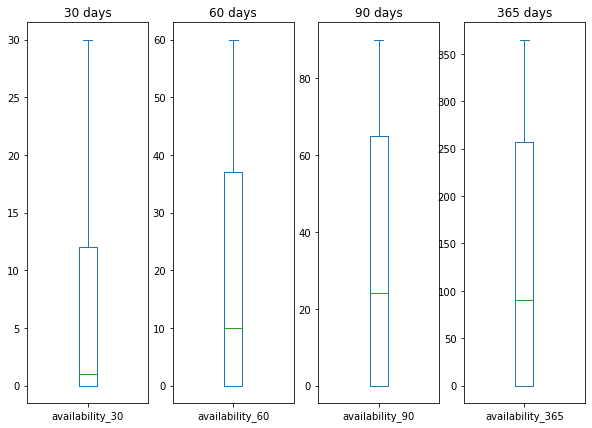

In [84]:
labels = [Milano['availability_30'].value_counts(),
          Milano['availability_60'].value_counts(),
          Milano['availability_90'].value_counts(),
          Milano['availability_365'].value_counts()]
avalist = ['30 days','60 days','90 days','365 days']
print("\t\tAvailability Of Milano Dataset")
Milano[['availability_30','availability_60','availability_90','availability_365']].plot(kind = 'box',subplots=True,title=avalist,figsize=(10,7),
                                                                                     style=['r', 'g', 'b', 'yellow'])

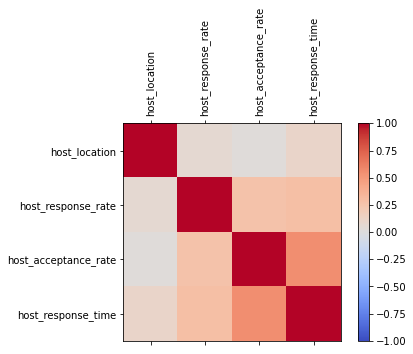

In [85]:
#Correlation -1 host-response
from numpy import corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
Host_one = York[['host_location','host_response_rate','host_acceptance_rate','host_response_time']]
CORR = Host_one.corr()


figure = plt.figure()
ax = figure.add_subplot(111)
cax = ax.matshow(CORR,cmap = 'coolwarm',vmin = -1,vmax=1)
figure.colorbar(cax)
ticks = np.arange(0,len(Host_one.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Host_one.columns)
ax.set_yticklabels(Host_one.columns)
plt.show()

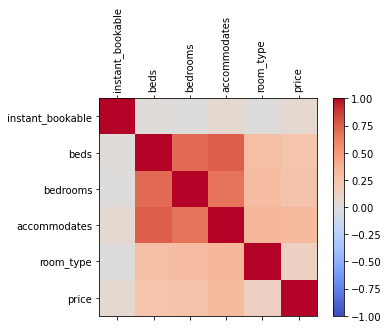

In [86]:
_property = York[['instant_bookable','beds','bedrooms','accommodates','room_type','price']]
_property_corre = _property.corr()


figure = plt.figure()
ax = figure.add_subplot(111)
cax = ax.matshow(_property_corre,cmap = 'coolwarm',vmin = -1,vmax=1)
figure.colorbar(cax)
ticks = np.arange(0,len(_property.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(_property.columns)
ax.set_yticklabels(_property.columns)
plt.show()

room_type          AxesSubplot(0.125,0.125;0.168478x0.755)
beds            AxesSubplot(0.327174,0.125;0.168478x0.755)
bedrooms        AxesSubplot(0.529348,0.125;0.168478x0.755)
accommodates    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

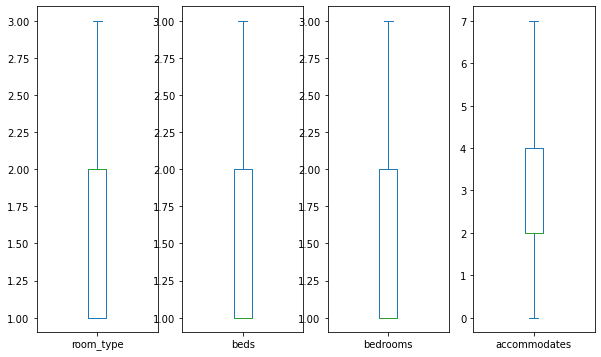

In [87]:
HouseInfo = outlier(York,['room_type','beds','bedrooms','accommodates'])
HouseInfo[['room_type','beds','bedrooms','accommodates']].plot(kind='box',subplots=True,figsize=(10,6))

In [121]:
NormYork=(York-York.min())/(York.max()-York.min())
Testing_York = outlier(NormYork,NormYork.columns)
NormMilano=(Milano-Milano.min())/(Milano.max()-Milano.min())
Mil = outlier(NormMilano,colm)


Y_Super_H = York[York['host_is_superhost'] > 0]
Y_NonSuper_H = York[York['host_is_superhost'] == 0]

M_Super_H =  Milano[Milano['host_is_superhost'] > 0]
M_NonSuper_H = Milano[Milano['host_is_superhost'] == 0]

In [122]:
def andrhypo(result):
    print(result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i],result.critical_values[i]
        if result.statistic <result.critical_values[i]:
            print("H0 is failed to reject")
        else:
            print("H0 is rejected")

            
        
#Statistical Test


#SIRA
#SHAPIRO TEST- NORMALIZASYON TESTI

#A-) STATISTICAL HYPOTHESIS TESTS
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal




#A-) PRICE-BED
#H0 Price value is  normally distributed
#H1 Price is not normally distributed
print("***Price-Bed Normality Test***")
#1-)Normality Test
andrhypo(anderson(Y_Super_H['price']))
andrhypo(anderson(M_Super_H['price']))
    


#Because the assumptions are now verified, the Mann-Whitney test can be conducted. 
#If the p-value is below the usually agreed alpha risk of 5 percent (0.05), 
#the null hypothesis can be rejected and at least one significant difference can be assumed

#H0: There is no significant difference between Beds and Price
#H1 They are significantly different 
u, p = mannwhitneyu(y=Y_Super_H['price'], x=Y_NonSuper_H['price'])
print ("Results : \n\tU-statistic: %.5f \n\tp-value: %g" % (u, p*2))
if(p > 0.05):
    print("H0 is not rejectable")
else:
    print("H0 is rejected. H1 stands true\n")






#B-)HOST ACCEPTANCE RATE - HOST RESPONSE TIME
    #1-)Normality Test
    print("***HOST ACCEPTANCE RATE - HOST RESPONSE TIME Normality Test***")
    
#H0 Host Acceptance Rate value is  normally distributed
#H1 Host Acceptance Rate is not normally distributed
andrhypo(anderson(Y_Super_H['host_acceptance_rate']))
andrhypo(anderson(M_Super_H['host_acceptance_rate']))


#H0: There is no significant difference between H.A.R and H.R.T
#H1 They are significantly different 

u, p = mannwhitneyu(y=Y_Super_H['host_acceptance_rate'], x=Y_NonSuper_H['host_acceptance_rate'])
print ("Results : \n\tU-statistic: %.5f \n\tp-value: %g" % (u, p*2))
if(p > 0.05):
    print("H0 is not rejectable")
else:
    print("H0 is rejected. H1 stands true\n")

    
    
    
    
    
#C-)- minimum_nights_avg_ntm - host_listings_count
#H0 Price value is  normally distributed
#H1 Price is not normally distributed
print("***host_listings_count Normality Test***")
#1-)Normality Test

#H0 host_listings_count value is  normally distributed
#H1 host_listings_count is not normally distributed
andrhypo(anderson(Y_Super_H['host_listings_count']))
andrhypo(anderson(M_Super_H['host_listings_count']))

#H0: H.l.C  are from same distribution
#H1 They are significantly different 

u, p = mannwhitneyu(x=Y_Super_H['host_listings_count'], y=Y_NonSuper_H['host_listings_count'])
print ("Results : \n\tU-statistic: %.5f \n\tp-value: %g" % (u, p *2))
if(p > 0.05):
    print("H0 is not rejectable")
else:
    print("H0 is rejected. H1 stands true\n")


***Price-Bed Normality Test***
842.8672870797545
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
341.812750381383
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
Results : 
	U-statistic: 121206578.00000 
	p-value: 4.81594e-19
H0 is rejected. H1 stands true

***HOST ACCEPTANCE RATE - HOST RESPONSE TIME Normality Test***
799.8190819651936
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
379.2759738614386
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
Results : 
	U-statistic: 69767649.50000 
	p-value: 0
H0 is rejected. H1 stands true

***host_listings_count Normality Test***
2158.596260613238
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
692.923935025924
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
H0 is rejected
Results : 
	U-statistic: 157346221.50000 
	p-value: 3.13037e-224
H0 is rejected. H1 stands true



In [90]:
#B-) Correlation tests
from scipy.stats.stats import pearsonr
#HO: there is a strong positive relationship between price and accomodates
#H1: There isn't strong positive relationship
corrYork = outlier(York,['minimum_nights_avg_ntm','host_listings_count'])


corTest_York = pearsonr(corrYork['host_listings_count'],corrYork['minimum_nights_avg_ntm'])
print("(New York) Pearson Correlation: {%f} and p value : {%f} " % corTest_York)

corTest_Milano = pearsonr(Milano['host_listings_count'],Milano['minimum_nights_avg_ntm'])
print("(Milano) Pearson Correlation: {%f} and p value : {%f} " % corTest_Milano)
#Our pvalue "1.933738523407879e-05" which equals to 0.013 which is less than desired pvalue 0.05.
# Therefore they are statistically significant, which proves H0

(New York) Pearson Correlation: {-0.165571} and p value : {0.000000} 
(Milano) Pearson Correlation: {-0.018549} and p value : {0.010069} 


In [91]:
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
machine = outlier(NormYork,colm)
colm = ['room_type','beds','bedrooms','accommodates','instant_bookable',"property_type","price"]
#Machine Learning Part 1  "Guessing Prices" no validation with specific columns NEW YORK

#A)Multilinear Regression NEW YORK


X_1 = machine[['room_type','beds','bedrooms','accommodates',"instant_bookable","property_type"]]
y_1 = machine['price']

X_train,X_test,y_train,y_test = train_test_split(X_1,y_1,test_size=0.25,random_state = 5)

Lineer = lm.LinearRegression()
MultLin = Lineer.fit(X_train,y_train)
Lineer_predict = MultLin.predict(X_test)

print("Linear-Regression Training Accuracy:{:.2f}".format(MultLin.score(X_train,y_train)))
print("Linear-Regression Testing Accuracy:{:.2f}".format(MultLin.score(X_test,y_test)))

print('Linear-Regression Mean Absolute Error:', mean_absolute_error(y_test, Lineer_predict))
print('Linear-Regression Mean Squared Error:', mean_squared_error(y_test, Lineer_predict))
print('Linear-Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Lineer_predict)))

print(MultLin.predict([[1,1.0,1.0,2,0,6]]))

Linear-Regression Training Accuracy:0.28
Linear-Regression Testing Accuracy:0.28
Linear-Regression Mean Absolute Error: 0.003342090189901744
Linear-Regression Mean Squared Error: 2.0111539075901673e-05
Linear-Regression Root Mean Squared Error: 0.004484589064329269
[0.06647562]


/home/erim/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
#B) KNN Approach NEW YORK
from sklearn.neighbors import KNeighborsRegressor
knn_price = KNeighborsRegressor(n_neighbors=5)
knn_model = knn_price.fit(X_train,y_train)
knn_pre = knn_price.predict(X_test)
print("KNN-Regression Training Accuracy:{:.2f}".format(knn_model.score(X_train,y_train)))
print("KNN-Regression Testing Accuracy:{:.2f}".format(knn_model.score(X_test,y_test)))

print('KNN-Regression Mean Absolute Error:', mean_absolute_error(y_test, knn_pre))
print('KNN-Regression Mean Squared Error:', mean_squared_error(y_test, knn_pre))
print('KNN-Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, knn_pre)))

KNN-Regression Training Accuracy:0.29
KNN-Regression Testing Accuracy:0.26
KNN-Regression Mean Absolute Error: 0.0032381942388705455
KNN-Regression Mean Squared Error: 2.0606935440793828e-05
KNN-Regression Root Mean Squared Error: 0.004539486252957908


In [93]:
#Lasso Regression
#from sklearn.linear_model import Lasso
#model_lasso = Lasso(fit_intercept=True,max_iter=250).fit(X_train,y_train)
#Naive_model = Naive.fit(X_train,y_train)
#Lasso_Predict = model_lasso.predict(X_test)

#print("Lasso Training Accuracy:{:.2f}".format(model_lasso.score(X_train,y_train)))
#print("Lasso Testing Accuracy:{:.2f}".format(model_lasso.score(X_test,y_test)))

#print('Lasso Mean Absolute Error:', mean_absolute_error(y_test, Lasso_Predict))
#print('Lasso Mean Squared Error:', mean_squared_error(y_test, Lasso_Predict))
#print('Lasso Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Lasso_Predict)))

In [94]:
from sklearn.model_selection import cross_val_score
#ML part 2 Cross Validation NEW YORK
#a-) Multi-Linear Regression

Linear_cv = cross_val_score(MultLin,X_train,y_train,cv = 250)

print("Linear-Regression with Cross Validation Accuracy:{:.2f}".format(Linear_cv.mean()))
print("Linear-Regression with Cross Validation Standart Deviation:{:.2f}".format(Linear_cv.std()))

#b-) Knn regression
knn_cv = cross_val_score(knn_model,X_train,y_train,cv = 150)
print("KNN-Regression with Cross Validation Accuracy:{:.2f}".format(knn_cv.mean()))
print("KNN-Regression with Cross Validation Standart Deviation:{:.2f}".format(knn_cv.std()))

#c-) lasso regression
#Lasso_cv = cross_val_score(model_lasso,X_train,y_train,cv = 150)
#print("Lasso with Cross Validation Accuracy:{:.2f}".format(Lasso_cv.mean()))
#print("Lasso with Cross Validation Standart Deviation:{:.2f}".format(Lasso_cv.std()))

Linear-Regression with Cross Validation Accuracy:0.27
Linear-Regression with Cross Validation Standart Deviation:0.08
KNN-Regression with Cross Validation Accuracy:0.28
KNN-Regression with Cross Validation Standart Deviation:0.08


In [95]:
#HOST 

In [96]:
#Part 2 Training with whole columns, No CROSS VAL.
DP = NormYork.drop(['host_id','host_is_superhost','instant_bookable'],axis=1)

York_out = outlier(DP,DP.columns)

X_2 = York_out.drop(['price'],axis=1)
y_2 = York_out['price']
X_train,X_test,y_train,y_test = train_test_split(X_2,y_2,test_size=0.25,random_state = 5)

Lineer = lm.LinearRegression()
MultLin = Lineer.fit(X_train,y_train)
Lineer_predict = MultLin.predict(X_test)

print("Linear-Regression Training Accuracy:{:.2f}".format(MultLin.score(X_train,y_train)))
print("Linear-Regression Testing Accuracy:{:.2f}".format(MultLin.score(X_test,y_test)))

print('Linear-Regression Mean Absolute Error:', mean_absolute_error(y_test, Lineer_predict))
print('Linear-Regression Mean Squared Error:', mean_squared_error(y_test, Lineer_predict))
print('Linear-Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Lineer_predict)))

Linear-Regression Training Accuracy:0.49
Linear-Regression Testing Accuracy:0.47
Linear-Regression Mean Absolute Error: 0.0026222339096985225
Linear-Regression Mean Squared Error: 1.2705871750804797e-05
Linear-Regression Root Mean Squared Error: 0.0035645296675444853


In [97]:
knn_price = KNeighborsRegressor(n_neighbors=20,leaf_size=50,p=1)
knn_model = knn_price.fit(X_train,y_train)
knn_pre = knn_price.predict(X_test)
print("KNN-Regression Training Accuracy:{:.2f}".format(knn_model.score(X_train,y_train)))
print("KNN-Regression Testing Accuracy:{:.2f}".format(knn_model.score(X_test,y_test)))

print('KNN-Regression Mean Absolute Error:', mean_absolute_error(y_test, knn_pre))
print('KNN-Regression Mean Squared Error:', mean_squared_error(y_test, knn_pre))
print('KNN-Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, knn_pre)))

KNN-Regression Training Accuracy:0.48
KNN-Regression Testing Accuracy:0.41
KNN-Regression Mean Absolute Error: 0.002764357204247415
KNN-Regression Mean Squared Error: 1.4206487733527574e-05
KNN-Regression Root Mean Squared Error: 0.0037691494708392203


In [98]:
#Part 2 CROSS VALIDATION NEW YORK

Linear_cv = cross_val_score(MultLin,X_train,y_train,cv = 300)

print("Linear-Regression with Cross Validation Accuracy:{:.2f}".format(Linear_cv.mean()))
print("Linear-Regression with Cross Validation Standart Deviation:{:.2f}".format(Linear_cv.std()))

#b-) Knn regression
knn_cv = cross_val_score(knn_model,X_train,y_train,cv = 250)
print("KNN-Regression with Cross Validation Accuracy:{:.2f}".format(knn_cv.mean()))
print("KNN-Regression with Cross Validation Standart Deviation:{:.2f}".format(knn_cv.std()))

Linear-Regression with Cross Validation Accuracy:0.36
Linear-Regression with Cross Validation Standart Deviation:0.39
KNN-Regression with Cross Validation Accuracy:0.32
KNN-Regression with Cross Validation Standart Deviation:0.32


In [99]:
Milano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19248 entries, 0 to 19247
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         19248 non-null  int64  
 1   host_location                   19248 non-null  int16  
 2   host_response_time              19248 non-null  int8   
 3   host_response_rate              19248 non-null  int8   
 4   host_acceptance_rate            19248 non-null  int8   
 5   host_is_superhost               19248 non-null  int64  
 6   host_listings_count             19248 non-null  int64  
 7   host_total_listings_count       19248 non-null  int64  
 8   host_verifications              19248 non-null  int8   
 9   host_has_profile_pic            19248 non-null  int64  
 10  host_identity_verified          19248 non-null  int64  
 11  latitude                        19248 non-null  float64
 12  longitude                       

In [100]:
#PART 1 PRICE GUESS NO CROSS VAL MILANO

NormMilano=(Milano-Milano.min())/(Milano.max()-Milano.min())
#Machine Learning Part 1  "Guessing Prices" no validation with specific columns NEW YORK

#A)Multilinear Regression NEW YORK
colm = ['beds','bedrooms','accommodates','instant_bookable',"price"]

Mil = outlier(NormMilano,colm)

X_3 = Mil[['beds','bedrooms','accommodates',"instant_bookable"]]
y_3 = Mil['price']

X_train,X_test,y_train,y_test = train_test_split(X_3,y_3,test_size=0.25,random_state = 5)

Lineer = lm.LinearRegression()
MultLin = Lineer.fit(X_train,y_train)
Lineer_predict = MultLin.predict(X_test)

print("Linear-Regression Training Accuracy:{:.2f}".format(MultLin.score(X_train,y_train)))
print("Linear-Regression Testing Accuracy:{:.2f}".format(MultLin.score(X_test,y_test)))

print('Linear-Regression Mean Absolute Error:', mean_absolute_error(y_test, Lineer_predict))
print('Linear-Regression Mean Squared Error:', mean_squared_error(y_test, Lineer_predict))
print('Linear-Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Lineer_predict)))

Linear-Regression Training Accuracy:0.12
Linear-Regression Testing Accuracy:0.11
Linear-Regression Mean Absolute Error: 0.000529236084987945
Linear-Regression Mean Squared Error: 4.640661708500128e-07
Linear-Regression Root Mean Squared Error: 0.0006812240239818417


In [101]:
knn_price = KNeighborsRegressor(n_neighbors=5)
knn_model = knn_price.fit(X_train,y_train)
knn_pre = knn_price.predict(X_test)
print("KNN-Regression Training Accuracy:{:.2f}".format(knn_model.score(X_train,y_train)))
print("KNN-Regression Testing Accuracy:{:.2f}".format(knn_model.score(X_test,y_test)))

print('KNN-Regression Mean Absolute Error:', mean_absolute_error(y_test, knn_pre))
print('KNN-Regression Mean Squared Error:', mean_squared_error(y_test, knn_pre))
print('KNN-Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, knn_pre)))

KNN-Regression Training Accuracy:-0.03
KNN-Regression Testing Accuracy:-0.07
KNN-Regression Mean Absolute Error: 0.0005730617761648451
KNN-Regression Mean Squared Error: 5.624091367207308e-07
KNN-Regression Root Mean Squared Error: 0.0007499394220340272


In [102]:
#Part 2 CROSS VALIDATION MILANO

Linear_cv = cross_val_score(MultLin,X_train,y_train,cv = 300)

print("Linear-Regression with Cross Validation Accuracy:{:.2f}".format(Linear_cv.mean()))
print("Linear-Regression with Cross Validation Standart Deviation:{:.2f}".format(Linear_cv.std()))

#b-) Knn regression
knn_cv = cross_val_score(knn_model,X_train,y_train,cv = 250)
print("KNN-Regression with Cross Validation Accuracy:{:.2f}".format(knn_cv.mean()))
print("KNN-Regression with Cross Validation Standart Deviation:{:.2f}".format(knn_cv.std()))

Linear-Regression with Cross Validation Accuracy:0.09
Linear-Regression with Cross Validation Standart Deviation:0.11
KNN-Regression with Cross Validation Accuracy:-0.08
KNN-Regression with Cross Validation Standart Deviation:0.20
